<a href="https://colab.research.google.com/github/fralfaro/r4ds-book/blob/main/docs/05_data_transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data transformation

## Introduction

Visualisation is an important tool for generating insight, but it's rare that you get the data in exactly the right form you need for it.
Often you'll need to create some new variables or summaries to see the most important patterns, or maybe you just want to rename the variables or reorder the observations to make the data a little easier to work with.
You'll learn how to do all that (and more!) in this chapter, which will introduce you to data transformation using the **dplyr** package and a new dataset on flights that departed New York City in 2013.

The goal of this chapter is to give you an overview of all the key tools for transforming a data frame.
We'll come back these functions in more detail in later chapters, as we start to dig into specific types of data (e.g. numbers, strings, dates).

### Prerequisites

In this chapter we'll focus on the dplyr package, another core member of the tidyverse.
We'll illustrate the key ideas using data from the nycflights13 package, and use ggplot2 to help us understand the data.



In [2]:
install.packages("nycflights13")
library(nycflights13)
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()




Take careful note of the conflicts message that's printed when you load the tidyverse.
It tells you that dplyr overwrites some functions in base R.
If you want to use the base version of these functions after loading dplyr, you'll need to use their full names: `stats::filter()` and `stats::lag()`.

### nycflights13

To explore the basic dplyr verbs, we're going to use `nycflights13::flights`.
This dataset contains all `r format(nrow(nycflights13::flights), big.mark = ",")` flights that departed from New York City in 2013.
The data comes from the US [Bureau of Transportation Statistics](http://www.transtats.bts.gov/DatabaseInfo.asp?DB_ID=120&Link=0), and is documented in `?flights`.



In [3]:
flights

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00



If you've used R before, you might notice that this data frame prints a little differently to other data frames you've seen.
That's because it's a **tibble**, a special type of data frame used by the tidyverse to avoid some common gotchas.
The most important difference is the way it prints: tibbles are designed for large datasets, so they only show the first few rows and only the columns that fit on one screen.
To see everything, use `View(flights)` to open the dataset in the RStudio viewer.
We'll come back to other important differences in [Chapter -@sec-tibbles].

You might have noticed the short abbreviations that follow each column name.
These tell you the type of each variable: `<int>` is short for integer, `<dbl>` is short for double (aka real numbers), `<chr>` for character (aka strings), and `<dttm>` for date-time.
These are important because the operations you can perform on a column depend so much on its "type", and these types are used to organize the chapters in the next section of the book.

### dplyr basics

You're about to learn the primary dplyr verbs which will allow you to solve the vast majority of your data manipulation challenges.
But before we discuss their individual differences, it's worth stating what they have in common:

1.  The first argument is always a data frame.

2.  The subsequent arguments describe what to do with the data frame, using the variable names (without quotes).

3.  The result is always a new data frame.

Because the first argument is a data frame and the output is a data frame, dplyr verbs work work well with the pipe, `|>`.
The pipe takes the thing on its left and passes it along to the function on its right so that `x |> f(y)` is equivalent to `f(x, y)`, and `x |> f(y) |> g(z)` is equivalent to into `g(f(x, y), z)`.
The easiest way to pronounce the pipe is "then".
That makes it possible to get a sense of the following code even though you haven't yet learnt the details:



In [4]:
flights |>
  filter(dest == "IAH") |> 
  group_by(year, month, day) |> 
  summarize(
    arr_delay = mean(arr_delay, na.rm = TRUE)
  )

`summarise()` has grouped output by 'year', 'month'. You can override using the
`.groups` argument.


year,month,day,arr_delay
<int>,<int>,<int>,<dbl>
2013,1,1,17.850000
2013,1,2,7.000000
2013,1,3,18.315789
2013,1,4,-3.200000
2013,1,5,20.230769
2013,1,6,9.277778
2013,1,7,-7.736842
2013,1,8,7.789474
2013,1,9,18.055556



The code starts with the flights dataset, then filters it, then groups it, then summarizes it.
We'll come back to the pipe and its alternatives in @sec-pipes.

dplyr's verbs are organised into four groups based on what they operate on: **rows**, **columns**, **groups**, or **tables**.
In the following sections you'll learn the most important verbs for rows, columns, and groups, then we'll come back to verb that work on tables in [Chapter -@sec-relational-data].
Let's dive in!

## Rows

The most important verbs that operate on rows are `filter()`, which changes which rows are present without changing their order, and `arrange()`, which changes the order of the rows without changing which are present.
Both functions only affect the rows, and the columns are left unchanged.

### `filter()`

`filter()` allows you to keep rows based on the values of the columns[^data-transform-1].
The first argument is the data frame.
The second and subsequent arguments are the conditions that must be true to keep the row.
For example, we could find all flights that arrived more than 120 minutes (two hours) late:

[^data-transform-1]: Later, you'll learn about the `slice_*()` family which allows you to choose rows based on their positions



In [5]:
flights |> 
  filter(arr_delay > 120)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,811,630,101,1047,830,137,MQ,4576,N531MQ,LGA,CLT,118,544,6,30,2013-01-01 06:00:00
2013,1,1,848,1835,853,1001,1950,851,MQ,3944,N942MQ,JFK,BWI,41,184,18,35,2013-01-01 18:00:00
2013,1,1,957,733,144,1056,853,123,UA,856,N534UA,EWR,BOS,37,200,7,33,2013-01-01 07:00:00
2013,1,1,1114,900,134,1447,1222,145,UA,1086,N76502,LGA,IAH,248,1416,9,0,2013-01-01 09:00:00
2013,1,1,1505,1310,115,1638,1431,127,EV,4497,N17984,EWR,RIC,63,277,13,10,2013-01-01 13:00:00
2013,1,1,1525,1340,105,1831,1626,125,B6,525,N231JB,EWR,MCO,152,937,13,40,2013-01-01 13:00:00
2013,1,1,1549,1445,64,1912,1656,136,EV,4181,N21197,EWR,MCI,234,1092,14,45,2013-01-01 14:00:00
2013,1,1,1558,1359,119,1718,1515,123,EV,5712,N826AS,JFK,IAD,53,228,13,59,2013-01-01 13:00:00
2013,1,1,1732,1630,62,2028,1825,123,EV,4092,N16911,EWR,DAY,119,533,16,30,2013-01-01 16:00:00



As well as `>` (greater than), you can use `>=` (greater than or equal to), `<` (less than), `<=` (less than or equal to), `==` (equal to), and `!=` (not equal to).
You can also use `&` (and) or `|` (or) to combine multiple conditions:


In [7]:
# Flights that departed on January 1
flights |> 
  filter(month == 1 & day == 1)


year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00


In [8]:

# Flights that departed in January or February
flights |> 
  filter(month == 1 | month == 2)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00



There's a useful shortcut when you're combining `|` and `==`: `%in%`.
It keeps rows where the variable equals one of the values on the right:



In [9]:
# A shorter way to select flights that departed in January or February
flights |> 
  filter(month %in% c(1, 2))

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00




We'll come back to these comparisons and logical operators in more detail in [Chapter -@sec-logicals].

When you run `filter()` dplyr executes the filtering operation, creating a new data frame, and then prints it.
It doesn't modify the existing `flights` dataset because dplyr functions never modify their inputs.
To save the result, you need to use the assignment operator, `<-`:



In [10]:
jan1 <- flights |> 
  filter(month == 1 & day == 1)


### Common mistakes

When you're starting out with R, the easiest mistake to make is to use `=` instead of `==` when testing for equality.
`filter()` will let you know when this happens:



In [11]:
flights |> 
  filter(month = 1)

ERROR: ignored


Another mistakes is you write "or" statements like you would in English:


In [12]:
flights |> 
  filter(month == 1 | 2)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00




This works, in the sense that it doesn't throw an error, but it doesn't do what you want.
We'll come back to what it does and why in @sec-boolean-operations.

### `arrange()`

`arrange()` changes the order of the rows based on the value of the columns.
It takes a data frame and a set of column names (or more complicated expressions) to order by.
If you provide more than one column name, each additional column will be used to break ties in the values of preceding columns.
For example, the following code sorts by the departure time, which is spread over four columns.



In [13]:
flights |> 
  arrange(year, month, day, dep_time)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00




You can use `desc()` to re-order by a column in descending order.
For example, this code shows the most delayed flights:



In [14]:
flights |> 
  arrange(desc(dep_delay))

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,9,641,900,1301,1242,1530,1272,HA,51,N384HA,JFK,HNL,640,4983,9,0,2013-01-09 09:00:00
2013,6,15,1432,1935,1137,1607,2120,1127,MQ,3535,N504MQ,JFK,CMH,74,483,19,35,2013-06-15 19:00:00
2013,1,10,1121,1635,1126,1239,1810,1109,MQ,3695,N517MQ,EWR,ORD,111,719,16,35,2013-01-10 16:00:00
2013,9,20,1139,1845,1014,1457,2210,1007,AA,177,N338AA,JFK,SFO,354,2586,18,45,2013-09-20 18:00:00
2013,7,22,845,1600,1005,1044,1815,989,MQ,3075,N665MQ,JFK,CVG,96,589,16,0,2013-07-22 16:00:00
2013,4,10,1100,1900,960,1342,2211,931,DL,2391,N959DL,JFK,TPA,139,1005,19,0,2013-04-10 19:00:00
2013,3,17,2321,810,911,135,1020,915,DL,2119,N927DA,LGA,MSP,167,1020,8,10,2013-03-17 08:00:00
2013,6,27,959,1900,899,1236,2226,850,DL,2007,N3762Y,JFK,PDX,313,2454,19,0,2013-06-27 19:00:00
2013,7,22,2257,759,898,121,1026,895,DL,2047,N6716C,LGA,ATL,109,762,7,59,2013-07-22 07:00:00




You can combine `arrange()` and `filter()` to solve more complex problems.
For example, we could look for the flights that were most delayed on arrival that left on roughly on time:



In [15]:
flights |> 
  filter(dep_delay <= 10 & dep_delay >= -10) |> 
  arrange(desc(arr_delay))

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,11,1,658,700,-2,1329,1015,194,VX,399,N629VA,JFK,LAX,336,2475,7,0,2013-11-01 07:00:00
2013,4,18,558,600,-2,1149,850,179,AA,707,N3EXAA,LGA,DFW,234,1389,6,0,2013-04-18 06:00:00
2013,7,7,1659,1700,-1,2050,1823,147,US,2183,N948UW,LGA,DCA,64,214,17,0,2013-07-07 17:00:00
2013,7,22,1606,1615,-9,2056,1831,145,DL,1619,N970DL,LGA,MSP,140,1020,16,15,2013-07-22 16:00:00
2013,9,19,648,641,7,1035,810,145,UA,1262,N17244,EWR,ORD,169,719,6,41,2013-09-19 06:00:00
2013,4,18,655,700,-5,1213,950,143,AA,2083,N565AA,EWR,DFW,230,1372,7,0,2013-04-18 07:00:00
2013,6,30,1423,1425,-2,1816,1554,142,B6,2402,N206JB,JFK,BUF,80,301,14,25,2013-06-30 14:00:00
2013,6,24,1523,1520,3,1931,1710,141,AA,341,N470AA,LGA,ORD,135,733,15,20,2013-06-24 15:00:00
2013,3,18,1844,1847,-3,39,2219,140,UA,389,N560UA,JFK,SFO,386,2586,18,47,2013-03-18 18:00:00



### Exercises

1.  Find all flights that

    a.  Had an arrival delay of two or more hours
    b.  Flew to Houston (`IAH` or `HOU`)
    c.  Were operated by United, American, or Delta
    d.  Departed in summer (July, August, and September)
    e.  Arrived more than two hours late, but didn't leave late
    f.  Were delayed by at least an hour, but made up over 30 minutes in flight

2.  Sort `flights` to find the flights with longest departure delays.
    Find the flights that left earliest in the morning.

3.  Sort `flights` to find the fastest flights (Hint: try sorting by a calculation).

4.  Which flights traveled the farthest?
    Which traveled the shortest?

5.  Does it matter what order you used `filter()` and `arrange()` in if you're using both?
    Why/why not?
    Think about the results and how much work the functions would have to do.

## Columns

There are four important verbs that affect the columns without changing the rows: `mutate()`, `select()`, `rename()`, and `relocate()`.
`mutate()` creates new columns that are functions of the existing columns; `select()`, `rename()`, and `relocate()` change which columns are present, their names, or their positions.

### `mutate()` 

The job of `mutate()` is to add new columns that are calculated from the existing columns.
In the transform chapters, you'll learn a large set of functions that you can use to manipulate different types of variables.
For now, we'll stick with basic algebra, which allows us to compute the `gain`, how much time a delayed flight made up in the air, and the `speed` in miles per hour:


In [16]:
flights |> 
  mutate(
    gain = dep_delay - arr_delay,
    speed = distance / air_time * 60
  )

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,⋯,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,gain,speed
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,⋯,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<dbl>,<dbl>
2013,1,1,517,515,2,830,819,11,UA,⋯,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00,-9,370.0441
2013,1,1,533,529,4,850,830,20,UA,⋯,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00,-16,374.2731
2013,1,1,542,540,2,923,850,33,AA,⋯,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00,-31,408.3750
2013,1,1,544,545,-1,1004,1022,-18,B6,⋯,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00,17,516.7213
2013,1,1,554,600,-6,812,837,-25,DL,⋯,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00,19,394.1379
2013,1,1,554,558,-4,740,728,12,UA,⋯,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00,-16,287.6000
2013,1,1,555,600,-5,913,854,19,B6,⋯,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00,-24,404.4304
2013,1,1,557,600,-3,709,723,-14,EV,⋯,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00,11,259.2453
2013,1,1,557,600,-3,838,846,-8,B6,⋯,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00,5,404.5714



By default, `mutate()` adds new columns on the right hand side of your dataset, which makes it difficult to see what's happening here.
We can use the `.before` argument to instead add the variables to the left hand side[^data-transform-2]:

[^data-transform-2]: Remember that in RStudio, the easiest way to see a dataset with many columns is `View()`.


In [17]:
flights |> 
  mutate(
    gain = dep_delay - arr_delay,
    speed = distance / air_time * 60,
    .before = 1
  )

gain,speed,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,⋯,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,⋯,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
-9,370.0441,2013,1,1,517,515,2,830,819,⋯,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
-16,374.2731,2013,1,1,533,529,4,850,830,⋯,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
-31,408.3750,2013,1,1,542,540,2,923,850,⋯,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
17,516.7213,2013,1,1,544,545,-1,1004,1022,⋯,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
19,394.1379,2013,1,1,554,600,-6,812,837,⋯,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
-16,287.6000,2013,1,1,554,558,-4,740,728,⋯,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
-24,404.4304,2013,1,1,555,600,-5,913,854,⋯,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
11,259.2453,2013,1,1,557,600,-3,709,723,⋯,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
5,404.5714,2013,1,1,557,600,-3,838,846,⋯,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00



The `.` is a sign that `.before` is an argument to the function, not the name of a new variable.
You can also use `.after` to add after a variable, and in both `.before` and `.after` you can the name of a variable name instead of a position.
For example, we could add the new variables after `day:`


In [18]:
flights |> 
  mutate(
    gain = dep_delay - arr_delay,
    speed = distance / air_time * 60,
    .after = day
  )

year,month,day,gain,speed,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,⋯,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,⋯,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,-9,370.0441,517,515,2,830,819,⋯,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,-16,374.2731,533,529,4,850,830,⋯,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,-31,408.3750,542,540,2,923,850,⋯,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,17,516.7213,544,545,-1,1004,1022,⋯,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,19,394.1379,554,600,-6,812,837,⋯,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,-16,287.6000,554,558,-4,740,728,⋯,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,-24,404.4304,555,600,-5,913,854,⋯,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,11,259.2453,557,600,-3,709,723,⋯,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
2013,1,1,5,404.5714,557,600,-3,838,846,⋯,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00



Alternatively, you can control which variables are kept with the `.keep` argument.
A particularly useful argument is `"used"` which allows you to see the inputs and outputs from your calculations:


In [19]:
flights |> 
  mutate(,
    gain = dep_delay - arr_delay,
    hours = air_time / 60,
    gain_per_hour = gain / hours,
    .keep = "used"
  )

dep_delay,arr_delay,air_time,gain,hours,gain_per_hour
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,11,227,-9,3.7833333,-2.3788546
4,20,227,-16,3.7833333,-4.2290749
2,33,160,-31,2.6666667,-11.6250000
-1,-18,183,17,3.0500000,5.5737705
-6,-25,116,19,1.9333333,9.8275862
-4,12,150,-16,2.5000000,-6.4000000
-5,19,158,-24,2.6333333,-9.1139241
-3,-14,53,11,0.8833333,12.4528302
-3,-8,140,5,2.3333333,2.1428571



### `select()` 

It's not uncommon to get datasets with hundreds or even thousands of variables.
In this situation, the first challenge is often just focusing on the variables you're interested in.
`select()` allows you to rapidly zoom in on a useful subset using operations based on the names of the variables.
`select()` is not terribly useful with the flights data because we only have 19 variables, but you can still get the general idea of how it works:


In [20]:
# Select columns by name
flights |> 
  select(year, month, day)


year,month,day
<int>,<int>,<int>
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1


In [21]:
# Select all columns between year and day (inclusive)
flights |> 
  select(year:day)


year,month,day
<int>,<int>,<int>
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1


In [22]:
# Select all columns except those from year to day (inclusive)
flights |> 
  select(!year:day)


dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00


In [23]:

# Select all columns that are characters
flights |> 
  select(where(is.character))

carrier,tailnum,origin,dest
<chr>,<chr>,<chr>,<chr>
UA,N14228,EWR,IAH
UA,N24211,LGA,IAH
AA,N619AA,JFK,MIA
B6,N804JB,JFK,BQN
DL,N668DN,LGA,ATL
UA,N39463,EWR,ORD
B6,N516JB,EWR,FLL
EV,N829AS,LGA,IAD
B6,N593JB,JFK,MCO




There are a number of helper functions you can use within `select()`:

-   `starts_with("abc")`: matches names that begin with "abc".
-   `ends_with("xyz")`: matches names that end with "xyz".
-   `contains("ijk")`: matches names that contain "ijk".
-   `num_range("x", 1:3)`: matches `x1`, `x2` and `x3`.

See `?select` for more details.
Once you know regular expressions (the topic of [Chapter -@sec-regular-expressions]) you'll also be use `matches()` to select variables that match a pattern.

You can rename variables as you `select()` them by using `=`.
The new name appears on the left hand side of the `=`, and the old variable appears on the right hand side:


In [24]:
flights |> 
  select(tail_num = tailnum)

tail_num
<chr>
N14228
N24211
N619AA
N804JB
N668DN
N39463
N516JB
N829AS
N593JB



### `rename()`

If you just want to keep all the existing variables and just want to rename a few, you can use `rename()` instead of `select()`:



In [25]:
flights |> 
  rename(tail_num = tailnum)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tail_num,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00



It works exactly the same way as `select()`, but keeps all the variables that aren't explicitly selected.

If you have a bunch of inconsistently named columns and it would be painful to fix them all by hand, check out `janitor::clean_names()` which provides some useful automated cleaning.

### `relocate()`

You can move variables around with `relocate()`.
By default it moves variables to the front:


In [26]:
flights |> 
  relocate(time_hour, air_time)

time_hour,air_time,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,distance,hour,minute
<dttm>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
2013-01-01 05:00:00,227,2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,1400,5,15
2013-01-01 05:00:00,227,2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,1416,5,29
2013-01-01 05:00:00,160,2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,1089,5,40
2013-01-01 05:00:00,183,2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,1576,5,45
2013-01-01 06:00:00,116,2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,762,6,0
2013-01-01 05:00:00,150,2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,719,5,58
2013-01-01 06:00:00,158,2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,1065,6,0
2013-01-01 06:00:00,53,2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,229,6,0
2013-01-01 06:00:00,140,2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,944,6,0



But you can use the same `.before` and `.after` arguments as `mutate()` to choose where to put them:


In [27]:
flights |> 
  relocate(year:dep_time, .after = time_hour)
  

sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,year,month,day,dep_time
<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<int>,<int>,<int>,<int>
515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00,2013,1,1,517
529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00,2013,1,1,533
540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00,2013,1,1,542
545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00,2013,1,1,544
600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00,2013,1,1,554
558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00,2013,1,1,554
600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00,2013,1,1,555
600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00,2013,1,1,557
600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00,2013,1,1,557


In [28]:

flights |> 
  relocate(starts_with("arr"), .before = dep_time)

year,month,day,arr_time,arr_delay,dep_time,sched_dep_time,dep_delay,sched_arr_time,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,830,11,517,515,2,819,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,850,20,533,529,4,830,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,923,33,542,540,2,850,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,1004,-18,544,545,-1,1022,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,812,-25,554,600,-6,837,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,740,12,554,558,-4,728,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,913,19,555,600,-5,854,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,709,-14,557,600,-3,723,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
2013,1,1,838,-8,557,600,-3,846,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00




### Exercises


Warning message:
“Removed 8255 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 8255 rows containing non-finite values (stat_bin).”


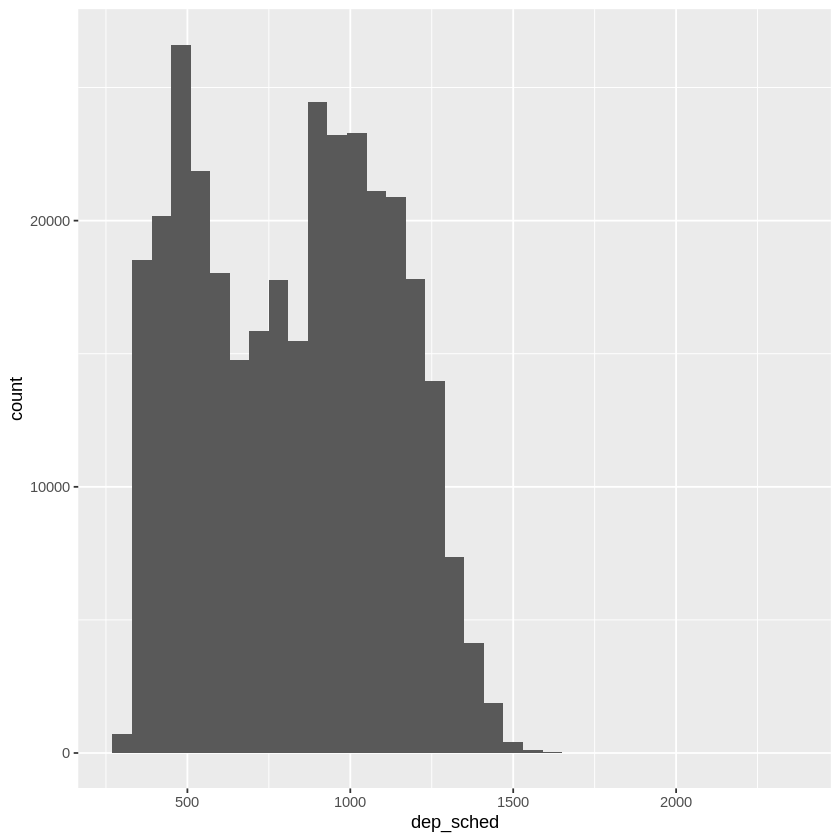

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 9430 rows containing non-finite values (stat_bin).”


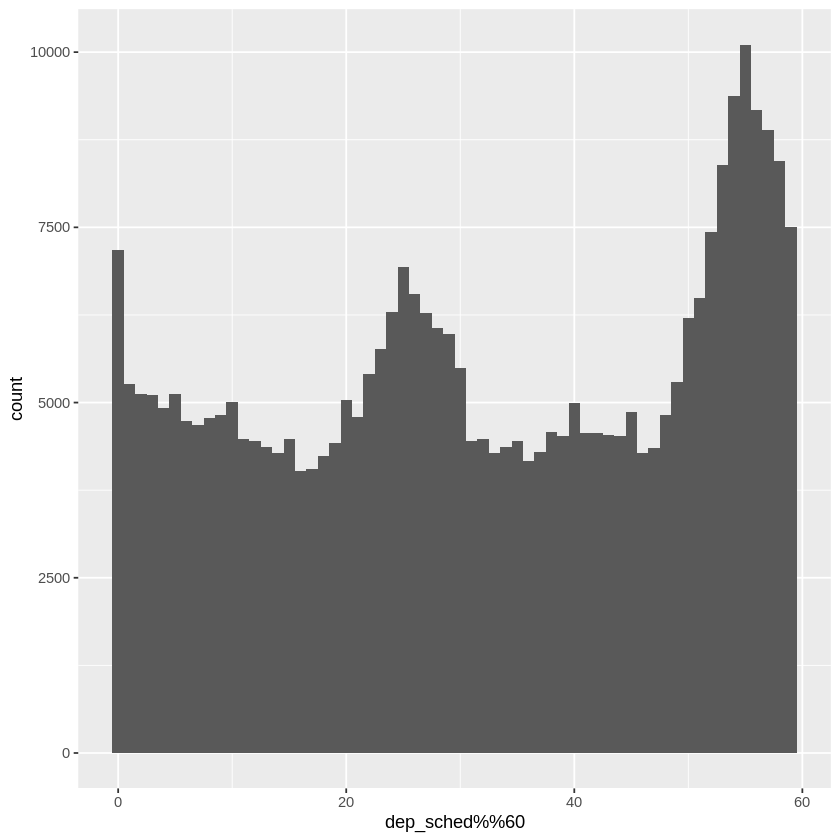

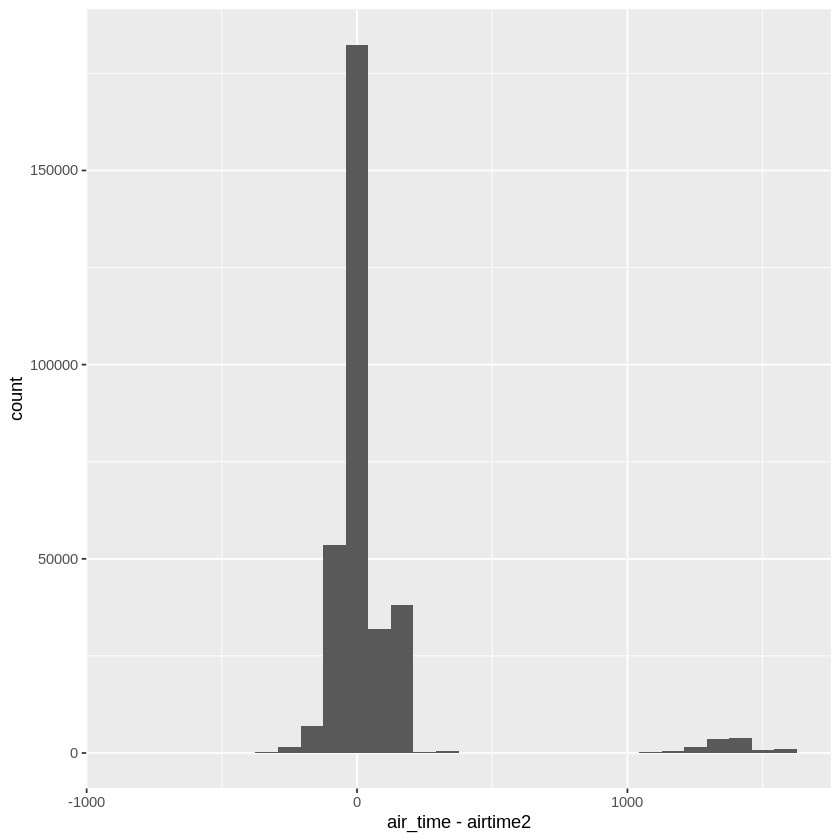

In [29]:
# For data checking, not used in results shown in book
flights <- flights |> mutate(
  dep_time = hour * 60 + minute,
  arr_time = (arr_time %/% 100) * 60 + (arr_time %% 100),
  airtime2 = arr_time - dep_time,
  dep_sched = dep_time + dep_delay
)

ggplot(flights, aes(dep_sched)) + geom_histogram(binwidth = 60)
ggplot(flights, aes(dep_sched %% 60)) + geom_histogram(binwidth = 1)
ggplot(flights, aes(air_time - airtime2)) + geom_histogram()


1.  Compare `air_time` with `arr_time - dep_time`.
    What do you expect to see?
    What do you see?
    What do you need to do to fix it?

2.  Compare `dep_time`, `sched_dep_time`, and `dep_delay`.
    How would you expect those three numbers to be related?

3.  Brainstorm as many ways as possible to select `dep_time`, `dep_delay`, `arr_time`, and `arr_delay` from `flights`.

4.  What happens if you include the name of a variable multiple times in a `select()` call?

5.  What does the `any_of()` function do?
    Why might it be helpful in conjunction with this vector?


In [30]:
variables <- c("year", "month", "day", "dep_delay", "arr_delay")


6.  Does the result of running the following code surprise you?
    How do the select helpers deal with case by default?
    How can you change that default?


In [31]:
select(flights, contains("TIME"))

dep_time,sched_dep_time,arr_time,sched_arr_time,air_time,time_hour,airtime2
<dbl>,<int>,<dbl>,<int>,<dbl>,<dttm>,<dbl>
315,515,510,819,227,2013-01-01 05:00:00,195
329,529,530,830,227,2013-01-01 05:00:00,201
340,540,563,850,160,2013-01-01 05:00:00,223
345,545,604,1022,183,2013-01-01 05:00:00,259
360,600,492,837,116,2013-01-01 06:00:00,132
358,558,460,728,150,2013-01-01 05:00:00,102
360,600,553,854,158,2013-01-01 06:00:00,193
360,600,429,723,53,2013-01-01 06:00:00,69
360,600,518,846,140,2013-01-01 06:00:00,158



## Groups

So far you've learned about functions that work with rows and columns.
dplyr gets even more powerful when you add in the ability to work with groups.
In this section, we'll focus on the most important functions: `group_by()`, `summarize()`, and the slice family of functions.

### `group_by()`

Use `group_by()` to divide your dataset into groups meaningful for your analysis:


In [32]:
flights |> 
  group_by(month)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,⋯,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,airtime2,dep_sched
<int>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<chr>,⋯,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<dbl>,<dbl>
2013,1,1,315,515,2,510,819,11,UA,⋯,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00,195,317
2013,1,1,329,529,4,530,830,20,UA,⋯,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00,201,333
2013,1,1,340,540,2,563,850,33,AA,⋯,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00,223,342
2013,1,1,345,545,-1,604,1022,-18,B6,⋯,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00,259,344
2013,1,1,360,600,-6,492,837,-25,DL,⋯,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00,132,354
2013,1,1,358,558,-4,460,728,12,UA,⋯,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00,102,354
2013,1,1,360,600,-5,553,854,19,B6,⋯,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00,193,355
2013,1,1,360,600,-3,429,723,-14,EV,⋯,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00,69,357
2013,1,1,360,600,-3,518,846,-8,B6,⋯,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00,158,357



`group_by()` doesn't change the data but, if you look closely at the output, you'll notice that it's now "grouped by" month.
This means subsequent operations will now work "by month".

### `summarize()` 

The most important grouped operation is a summary.
It collapses each group to a single row[^data-transform-3].
Here we compute the average departure delay by month:

[^data-transform-3]: This is a slightly simplification; later on you'll learn how to use `summarize()` to produce multiple summary rows for each group.


In [33]:
flights |> 
  group_by(month) |> 
  summarize(
    delay = mean(dep_delay)
  )

month,delay
<int>,<dbl>
1,NA
2,NA
3,NA
4,NA
5,NA
6,NA
7,NA
8,NA
9,NA



Uhoh!
Something has gone wrong and all of our results are `NA` (pronounced "N-A"), R's symbol for missing value.
We'll come back to discuss missing values in [Chapter -@sec-missing-values], but for now we'll remove them by using `na.rm = TRUE`:



In [34]:
flights |> 
  group_by(month) |> 
  summarize(
    delay = mean(dep_delay, na.rm = TRUE)
  )

month,delay
<int>,<dbl>
1,10.036665
2,10.816843
3,13.227076
4,13.938038
5,12.986859
6,20.846332
7,21.727787
8,12.611040
9,6.722476



You can create any number of summaries in a single call to `summarize()`.
You'll learn various useful summaries in the upcoming chapters, but one very useful summary is `n()`, which returns the number of rows in each group:



In [35]:
flights |> 
  group_by(month) |> 
  summarize(
    delay = mean(dep_delay, na.rm = TRUE), 
    n = n()
  )

month,delay,n
<int>,<dbl>,<int>
1,10.036665,27004
2,10.816843,24951
3,13.227076,28834
4,13.938038,28330
5,12.986859,28796
6,20.846332,28243
7,21.727787,29425
8,12.611040,29327
9,6.722476,27574



Means and counts can get you a surprisingly long way in data science!

### The `slice_` functions

There are five handy functions that allow you pick off specific rows within each group:

-   `df |> slice_head(n = 1)` takes the first row from each group.
-   `df |> slice_tail(n = 1)` takes the last row in each group.
-   `df |> slice_min(x, n = 1)` takes the row with the smallest value of `x`.
-   `df |> slice_max(x, n = 1)` takes the row with the largest value of `x`.
-   `df |> slice_sample(x, n = 1)` takes one random row.

You can vary `n` to select more than one row, or instead of `n =`, you can use `prop = 0.1` to select (e.g.) 10% of the rows in each group.
For example, the following code finds the most delayed flight to each destination:



In [36]:
flights |> 
  group_by(dest) |> 
  slice_max(arr_delay, n = 1)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,⋯,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,airtime2,dep_sched
<int>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<chr>,⋯,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<dbl>,<dbl>
2013,7,22,1207,2007,98,92,2259,153,B6,⋯,N784JB,JFK,ABQ,259,1826,20,7,2013-07-22 20:00:00,-1115,1305
2013,7,23,480,800,219,770,909,221,B6,⋯,N192JB,JFK,ACK,44,199,8,0,2013-07-23 08:00:00,290,699
2013,1,25,1200,2000,323,149,2101,328,EV,⋯,N13908,EWR,ALB,30,143,20,0,2013-01-25 20:00:00,-1051,1523
2013,8,17,985,1625,75,1242,2003,39,UA,⋯,N528UA,EWR,ANC,404,3370,16,25,2013-08-17 16:00:00,257,1060
2013,7,22,479,759,898,81,1026,895,DL,⋯,N6716C,LGA,ATL,109,762,7,59,2013-07-22 07:00:00,-398,1377
2013,7,10,905,1505,351,1427,1758,349,UA,⋯,N803UA,EWR,AUS,192,1504,15,5,2013-07-10 15:00:00,522,1256
2013,8,13,512,832,204,857,1029,228,EV,⋯,N13538,EWR,AVL,108,583,8,32,2013-08-13 08:00:00,345,716
2013,2,21,796,1316,252,1119,1413,266,EV,⋯,N16976,EWR,BDL,26,116,13,16,2013-02-21 13:00:00,323,1048
2013,12,1,656,1056,248,988,1230,238,EV,⋯,N615QX,LGA,BGR,57,378,10,56,2013-12-01 10:00:00,332,904




This is similar to computing the max delay with `summarize()`, but you get the whole row instead of the single summary:


In [37]:
flights |> 
  group_by(dest) |> 
  summarize(max_delay = max(arr_delay, na.rm = TRUE))

Warning message in max(arr_delay, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”


dest,max_delay
<chr>,<dbl>
ABQ,153
ACK,221
ALB,328
ANC,39
ATL,895
AUS,349
AVL,228
BDL,266
BGR,238




### Grouping by multiple variables

You can create groups using more than one variable.
For example, we could make a group for each day:


In [38]:
daily <- flights |>  
  group_by(year, month, day)
daily

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,⋯,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,airtime2,dep_sched
<int>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<chr>,⋯,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<dbl>,<dbl>
2013,1,1,315,515,2,510,819,11,UA,⋯,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00,195,317
2013,1,1,329,529,4,530,830,20,UA,⋯,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00,201,333
2013,1,1,340,540,2,563,850,33,AA,⋯,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00,223,342
2013,1,1,345,545,-1,604,1022,-18,B6,⋯,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00,259,344
2013,1,1,360,600,-6,492,837,-25,DL,⋯,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00,132,354
2013,1,1,358,558,-4,460,728,12,UA,⋯,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00,102,354
2013,1,1,360,600,-5,553,854,19,B6,⋯,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00,193,355
2013,1,1,360,600,-3,429,723,-14,EV,⋯,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00,69,357
2013,1,1,360,600,-3,518,846,-8,B6,⋯,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00,158,357



When you summarize a tibble grouped by more than one variable, each summary peels off the last group.
In hindsight, this wasn't great way to make this function work, but it's difficult to change without breaking existing code.
To make it obvious what's happening, dplyr displays a message that tells you how you can change this behavior:



In [39]:
daily_flights <- daily |> 
  summarize(
    n = n()
  )

`summarise()` has grouped output by 'year', 'month'. You can override using the
`.groups` argument.



If you're happy with this behavior, you can explicitly request it in order to suppress the message:


In [40]:
daily_flights <- daily |> 
  summarize(
    n = n(), 
    .groups = "drop_last"
  )



Alternatively, change the default behavior by setting a different value, e.g. `"drop"` to drop all grouping or `"keep"` to preserve the same groups.

### Ungrouping

You might also want to remove grouping outside of `summarize()`.
You can do this with `ungroup()`.


In [41]:
daily |> 
  ungroup() |>
  summarize(
    delay = mean(dep_delay, na.rm = TRUE), 
    flights = n()
  )

delay,flights
<dbl>,<int>
12.63907,336776



As you can see, when you summarize an ungrouped data frame, you get a single row back because dplyr treats all the rows in an ungrouped data frame as belonging to one group.

### Exercises

1.  Which carrier has the worst delays?
    Challenge: can you disentangle the effects of bad airports vs. bad carriers?
    Why/why not?
    (Hint: think about `flights |> group_by(carrier, dest) |> summarize(n())`)

2.  Find the most delayed flight to each destination.

3.  How do delays vary over the course of the day.
    Illustrate your answer with a plot.

4.  What happens if you supply a negative `n` to `slice_min()` and friends?

5.  Explain what `count()` does in terms of the dplyr verbs you just learn.
    What does the `sort` argument to `count()` do?

## Case study: aggregates and sample size {#sec-sample-size}

Whenever you do any aggregation, it's always a good idea to include a count (`n()`).
That way, you can ensure that you're not drawing conclusions based on very small amounts of data.
For example, let's look at the planes (identified by their tail number) that have the highest average delays:


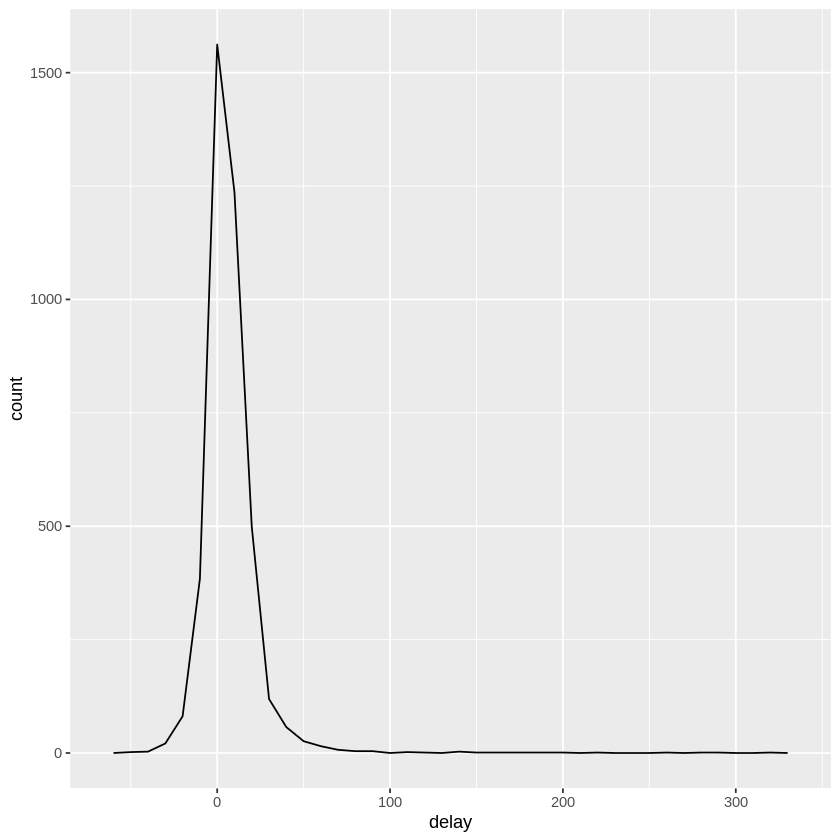

In [42]:
delays <- flights |>  
  filter(!is.na(arr_delay), !is.na(tailnum)) |> 
  group_by(tailnum) |> 
  summarize(
    delay = mean(arr_delay, na.rm = TRUE),
    n = n()
  )

ggplot(delays, aes(delay)) + 
  geom_freqpoly(binwidth = 10)


Wow, there are some planes that have an *average* delay of 5 hours (300 minutes)!
That seems pretty surprising, so lets draw a scatterplot of number of flights vs. average delay:


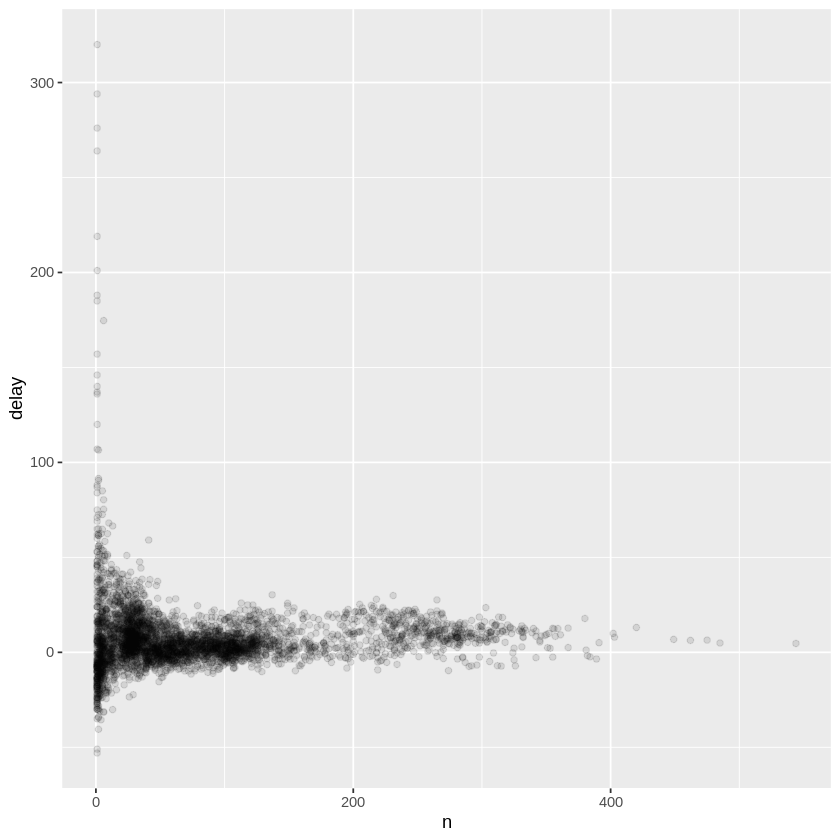

In [43]:
ggplot(delays, aes(n, delay)) + 
  geom_point(alpha = 1/10)


Not surprisingly, there is much greater variation in the average delay when there are few flights for a given plane.
The shape of this plot is very characteristic: whenever you plot a mean (or other summary) vs. group size, you'll see that the variation decreases as the sample size increases[^data-transform-4].

[^data-transform-4]: \*cough\* the central limit theorem \*cough\*

When looking at this sort of plot, it's often useful to filter out the groups with the smallest numbers of observations, so you can see more of the pattern and less of the extreme variation in the smallest groups:



`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



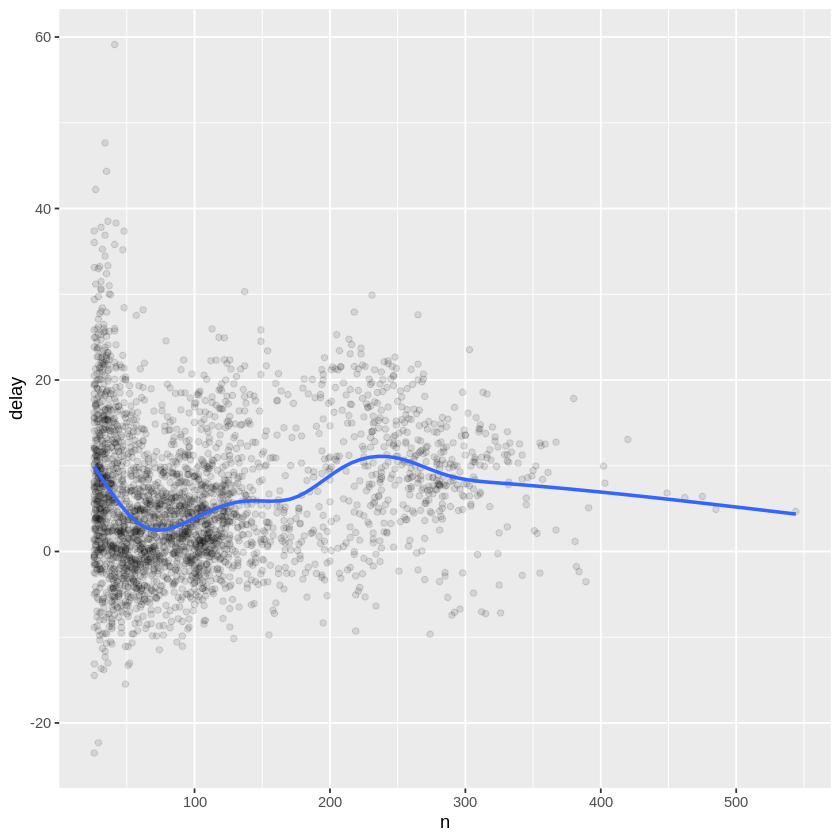

In [44]:
delays |>  
  filter(n > 25) |> 
  ggplot(aes(n, delay)) + 
  geom_point(alpha = 1/10) + 
  geom_smooth(se = FALSE)


Note the handy pattern for combining ggplot2 and dplyr.
It's a bit annoying that you have to switch from `|>` to `+`, but it's not too much of a hassle once you get the hang of it.

There's another common variation on this pattern that we can see in some data about baseball players.
The following code uses data from the **Lahman** package to compare what proportion of times a player hits the ball vs. the number of attempts they take:


In [46]:
install.packages("Lahman")
library("Lahman")

batters <- Lahman::Batting |> 
  group_by(playerID) |> 
  summarize(
    perf = sum(H, na.rm = TRUE) / sum(AB, na.rm = TRUE),
    n = sum(AB, na.rm = TRUE)
  )
batters

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



playerID,perf,n
<chr>,<dbl>,<int>
aardsda01,0.00000000,4
aaronha01,0.30499838,12364
aaronto01,0.22881356,944
aasedo01,0.00000000,5
abadan01,0.09523810,21
abadfe01,0.11111111,9
abadijo01,0.22448980,49
abbated01,0.25361367,3044
abbeybe01,0.16888889,225



When we plot the skill of the batter (measured by the batting average, `ba`) against the number of opportunities to hit the ball (measured by at bat, `ab`), you see two patterns:

1.  As above, the variation in our aggregate decreases as we get more data points.

2.  There's a positive correlation between skill (`perf`) and opportunities to hit the ball (`n`) because obviously teams want to give their best batters the most opportunities to hit the ball.


`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



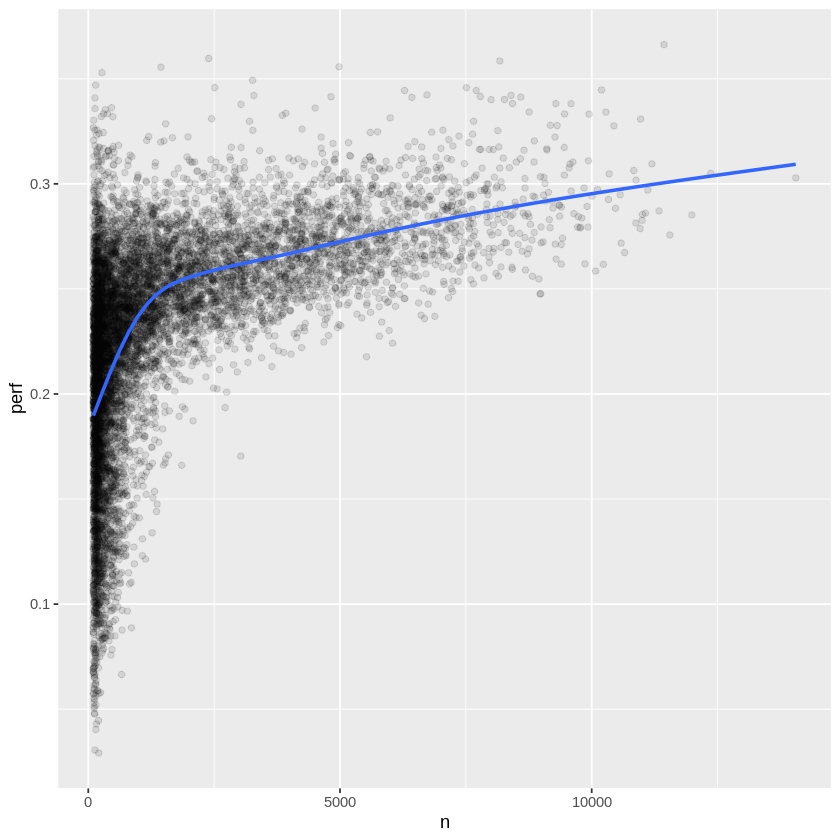

In [47]:
batters |> 
  filter(n > 100) |> 
  ggplot(aes(n, perf)) +
    geom_point(alpha = 1 / 10) + 
    geom_smooth(se = FALSE)


This also has important implications for ranking.
If you naively sort on `desc(ba)`, the people with the best batting averages are clearly lucky, not skilled:


In [48]:
batters |> 
  arrange(desc(perf))

playerID,perf,n
<chr>,<dbl>,<int>
abramge01,1,1
alberan01,1,1
banisje01,1,1
bartocl01,1,1
bassdo01,1,1
birasst01,1,2
bruneju01,1,1
burnscb01,1,1
cammaer01,1,1



You can find a good explanation of this problem and how to overcome it at <http://varianceexplained.org/r/empirical_bayes_baseball/> and <http://www.evanmiller.org/how-not-to-sort-by-average-rating.html>.
